In [1]:
# --- (3) Building a Simple Linear Model --- #

In [2]:
# --- Simple Linear Regression --- #

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
automobile_df = pd.read_csv('datasets/auto-mpg/processed.csv')

automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
371,29.0,4,97.0,75,2171,16.0,48
69,34.1,4,91.0,68,1985,16.0,42
341,17.6,8,302.0,129,3725,13.4,44
288,19.0,6,232.0,90,3211,17.0,48
239,19.0,6,225.0,100,3630,17.7,46


In [5]:
from sklearn.model_selection import train_test_split

# Note the double bracket around horsepower somehow makes it the sample title below
X = automobile_df[['horsepower']]
Y = automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [6]:
x_train.sample(5)

,horsepower
102,88
319,67
245,150
115,150
322,180


In [7]:
from sklearn.linear_model import LinearRegression

# Tutoral passed normalize=True as an init param but this scikit version doesn't take a normalize param
    # It would scale features to range from 0 to 1
    # Should look into why it is no longer an option - handled inherently? expected to handle ahead of time?
    # My results were slightly worse than tutorial, so wondering if it's related
# The fit method executes the actual training (fits the model, train on the feature x and adjust based on target y)
linear_model = LinearRegression().fit(x_train, y_train)

In [8]:
# Print the model's R-square value, a measure of how well the model captures the underlying variation in the training data
print('Training score: ', linear_model.score(x_train, y_train))

Training score:  0.6072818976974055


In [9]:
y_pred = linear_model.predict(x_test)

In [10]:
from sklearn.metrics import r2_score

# Print the prediction score
print('Testing score: ', r2_score(y_test, y_pred))

Testing score:  0.5889307872115765


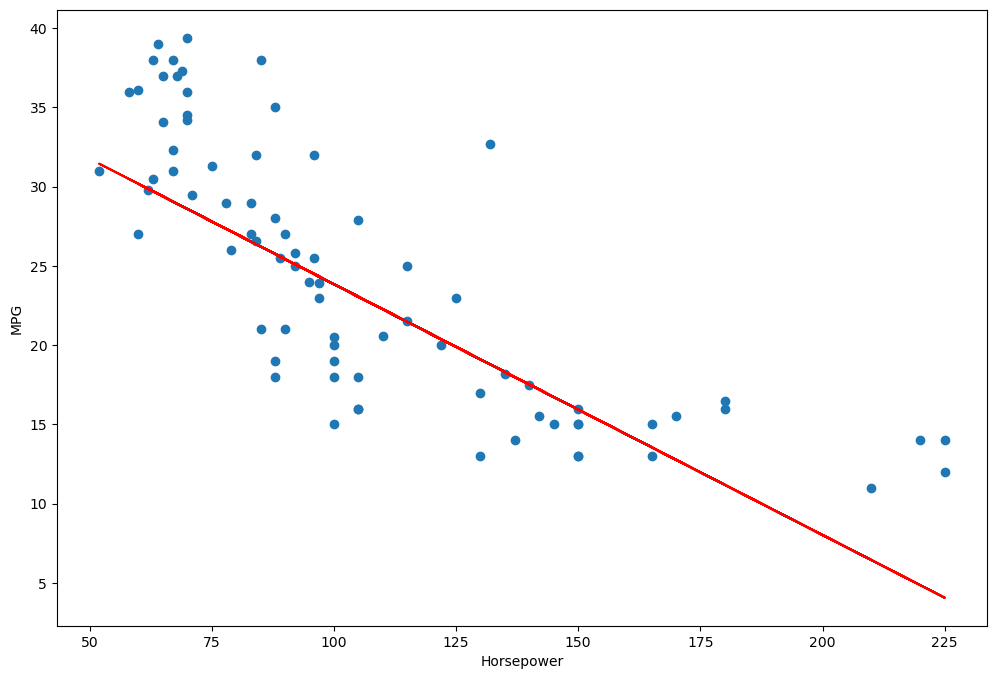

In [11]:
fix, ax = plt.subplots(figsize=(12,8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

Training score:  0.3348137726020709
Testing score:  0.339359833012877


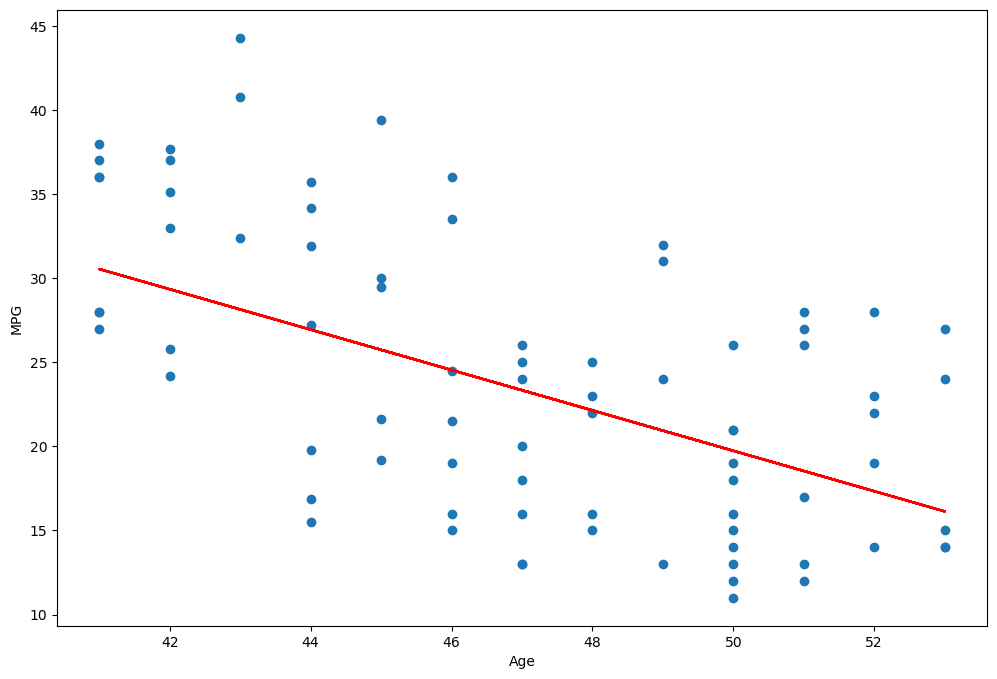

In [12]:
# Now train it on Age rather than Horsepower - this will show that Horsepower is a much better predictor than Age
X = automobile_df[['age']]
Y = automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

linear_model = LinearRegression().fit(x_train, y_train)
print('Training score: ', linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)
print('Testing score: ', r2_score(y_test, y_pred))

fix, ax = plt.subplots(figsize=(12,8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Age')
plt.ylabel('MPG')
plt.show()

In [13]:
# ------------------------------------------------ #
# --- Linear Regression with Multiple Features --- #
# ------------------------------------------------ #

In [14]:
# You can play around with the features - avoid "kitchen sink", find goldilocks
X = automobile_df[['displacement', 'horsepower', 'weight', 'acceleration', 'cylinders']]
Y = automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [15]:
linear_model = LinearRegression().fit(x_train, y_train)

In [16]:
print('Training score: ', linear_model.score(x_train, y_train))

Training score:  0.7009157993833988


In [17]:
# A linear model assumes a linear relationship between the features and the prediction label 
# This linear relationship is written as y = wx + b, where w and b are the model parameters:
    # w are the weights (coefficients) used to multiply the x variables (features)
    # b is bias
    
# Get the coefficients of the model's x values (predictors, x_train, columns)
predictors = x_train.columns
coef = pd.Series(linear_model.coef_, predictors).sort_values()
print(coef)

# Note the negative values suggest that as those values increase, the predicted value (MPG) goes down

cylinders      -0.508361
horsepower     -0.038735
acceleration   -0.028811
weight         -0.005679
displacement    0.003384
dtype: float64


In [18]:
y_pred = linear_model.predict(x_test)

In [19]:
# R-squared with mutliple features produced better results than just Age or Horsepower alone
print('Testing score: ', r2_score(y_test, y_pred))

Testing score:  0.7287310391983646


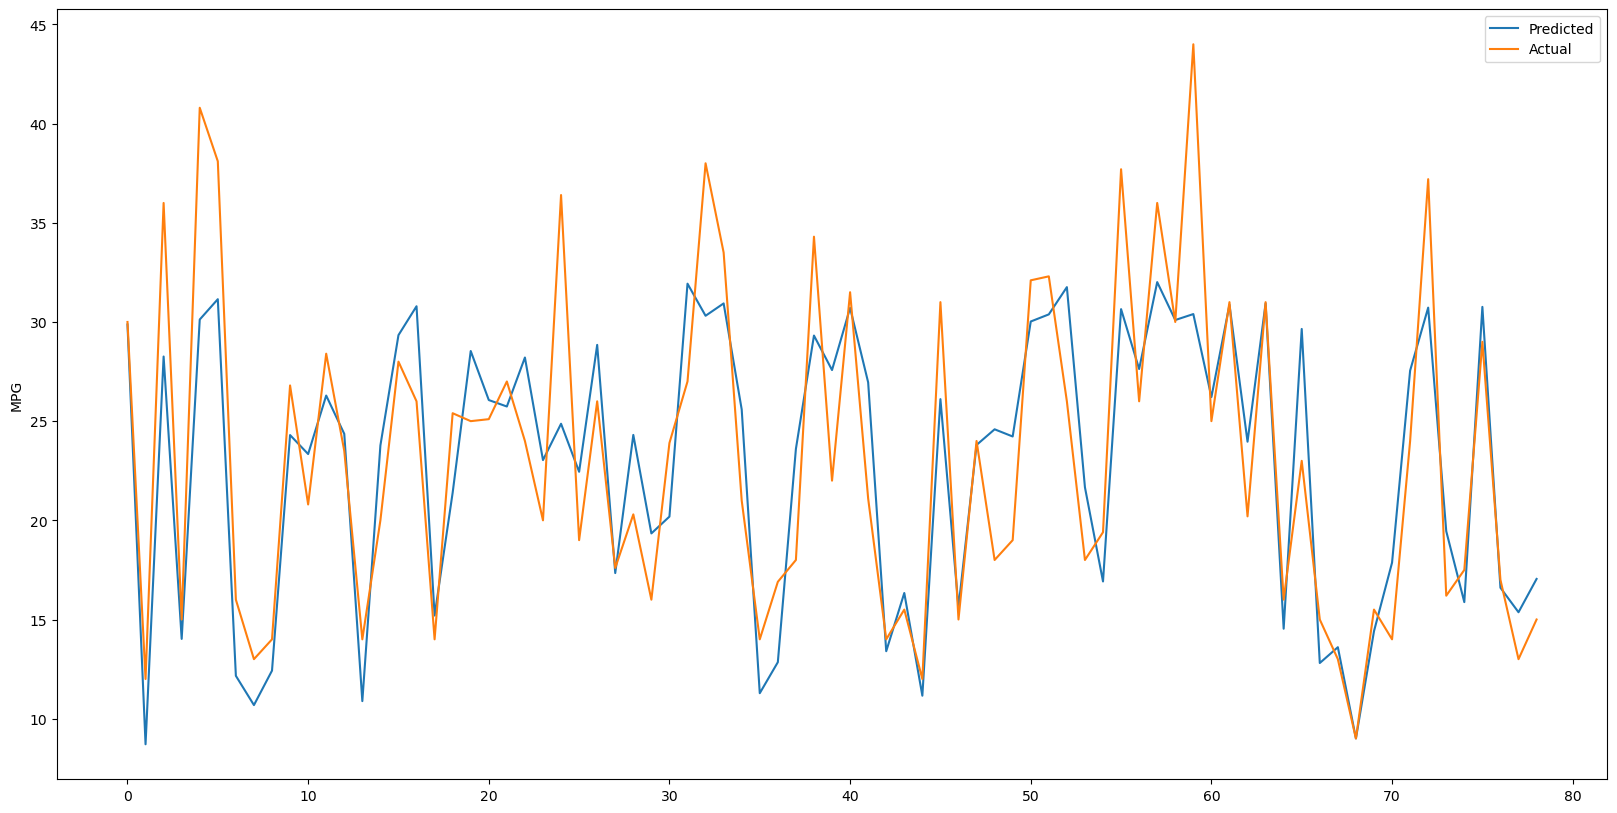

In [20]:
plt.figure(figsize = (20,10))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('MPG')

plt.legend()
plt.show()